In [1]:
PI =[
5087.142857,
5319.142857,
5191.857143,
4975.285714,
4841.142857,
4738,
4726.142857,
4616.857143,
4505.571429,
4496.428571,
4384.714286,
4328.571429,
4430.142857,
4917.428571,
5122.285714,
4831.428571,
4534.714286,
4226.857143,
3981.571429,
3722,
3578,
3397.285714,
3381,
3262.857143,
3194,
3148.571429,
3147.857143,
3297.714286,
3292.428571,
3392.285714,
3370.428571,
3330.571429,
3295.285714,
3227.857143,
3151.428571,
3144.428571,
3150.571429,
3150.857143,
3179.571429,
3212.375,
3259.5,
3331.75,
3380.125,
3362.375,
3300.25,
3036.375,
3286.857143,
3409.285714,
3580.571429,
3757.714286,
3890.142857,
4248.857143]
Influenza = [
    511,
586.2857143,
561.2857143,
523.2857143,
492.1428571,
480.1428571,
495.2857143,
450.5714286,
435.5714286,
389.8571429,
362.4285714,
313,
280.5714286,
255.2857143,
220,
149.2857143,
105.7142857,
71.85714286,
50.57142857,
34.57142857,
25.14285714,
18.85714286,
15.85714286,
14.14285714,
9.428571429,
9.142857143,
9.571428571,
6.714285714,
7.142857143,
6.428571429,
5.428571429,
6.142857143,
6.428571429,
7.428571429,
7.142857143,
6.857142857,
8,
9.857142857,
10.71428571,
11.5,
11.875,
15.75,
18.625,
21.5,
22.875,
21.25,
32,
46,
64.57142857,
90.85714286,
157.4285714,
274.5714286,
1014
]

<Figure size 432x288 with 0 Axes>

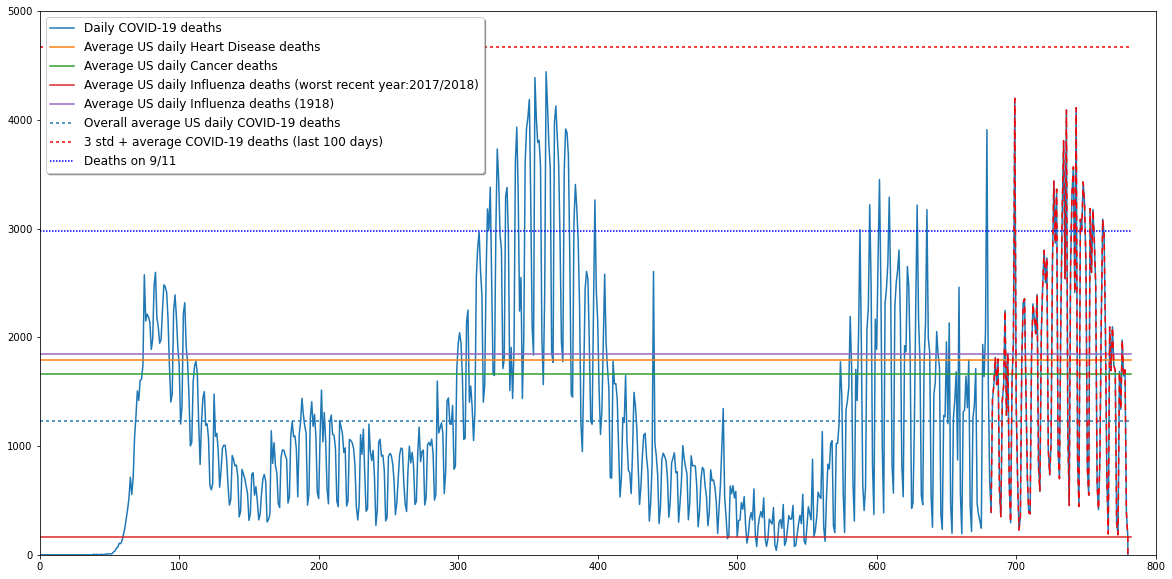

In [2]:
import csv
from numpy import diff, std
import matplotlib.pyplot as plt

def read_covid_data(data_type):
    if (data_type in ['confirmed', 'deaths', 'recovered']):
        COVID_directory = "/Users/kootsoop/git/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
        first_row = None
        with open(COVID_directory + 'time_series_covid19_' + data_type + '_global.csv') as csvfile:
            confirmed = csv.reader(csvfile)
            for row in confirmed:
                if (first_row == None):
                    first_row = row
                if (row[1] == 'US'):
                    us_data = row
                    break
    else:
        raise Exception('Invalid data_type', data_type)
    return(first_row, us_data)

(first_row, confirmed) = read_covid_data('confirmed')
(first_row2, recovered) = read_covid_data('recovered')
(first_row3, deaths) = read_covid_data('deaths')

death_data = [(float(data)) for data in deaths[4:(len(first_row))]]
recovered_data = [(float(data)) for data in recovered[4:(len(first_row))]]
confirmed_data = [(float(data)) for data in confirmed[4:(len(first_row))]]
first_row_shifted = [ data for data in first_row[4:(len(first_row))]]

diff_death_data = diff(death_data)
length_death_data = len(diff_death_data)

last_n_days = 100

plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(diff_death_data, label='Daily COVID-19 deaths')
# https://www.cdc.gov/heartdisease/facts.htm
plt.plot([0, len(diff_death_data)],[655000.0/365.0,655000.0/365.0], label='Average US daily Heart Disease deaths')
# https://cancerstatisticscenter.cancer.org/#!/
plt.plot([0, len(diff_death_data)],[606520.0/365.0,606520.0/365.0], label='Average US daily Cancer deaths')
# https://www.cdc.gov/flu/about/burden/past-seasons.html
plt.plot([0, len(diff_death_data)],[61000/365.0,61000/365.0], label='Average US daily Influenza deaths (worst recent year:2017/2018)')
# https://www.cdc.gov/flu/pandemic-resources/1918-commemoration/1918-pandemic-history.htm#:~:text=The%20number%20of%20deaths%20was,and%2065%20years%20and%20older.
plt.plot([0, len(diff_death_data)],[675000/365.0,675000/365.0], label='Average US daily Influenza deaths (1918)')
covid_average = death_data[len(death_data)-1]/len(death_data)
plt.plot([0, len(diff_death_data)],[covid_average,covid_average], color='#1f77b4', dashes=[2,2], label='Overall average US daily COVID-19 deaths')
covid_average_100 = (death_data[len(death_data)-1] - death_data[len(death_data)-last_n_days-1])/last_n_days
covid_std_upper = covid_average + 3*std(diff(death_data[len(death_data)-last_n_days:len(death_data)]))
plt.plot([0, len(diff(death_data))],[covid_std_upper,covid_std_upper], color='#ff0000', dashes=[2,2], label='3 std + average COVID-19 deaths (last 100 days)')

plt.plot([0, len(diff(death_data))],[2977,2977], color='#0000ff', dashes=[1,1], label='Deaths on 9/11')


plt.plot(range(length_death_data-last_n_days, length_death_data), diff_death_data[range(length_death_data-last_n_days, length_death_data)], color="red",dashes=[4,4])
plt.ylim(0,5000)
plt.xlim(0,800)

ax = plt.gca()
ax.legend(loc='upper left', shadow=True, fontsize=12)

<Figure size 432x288 with 0 Axes>

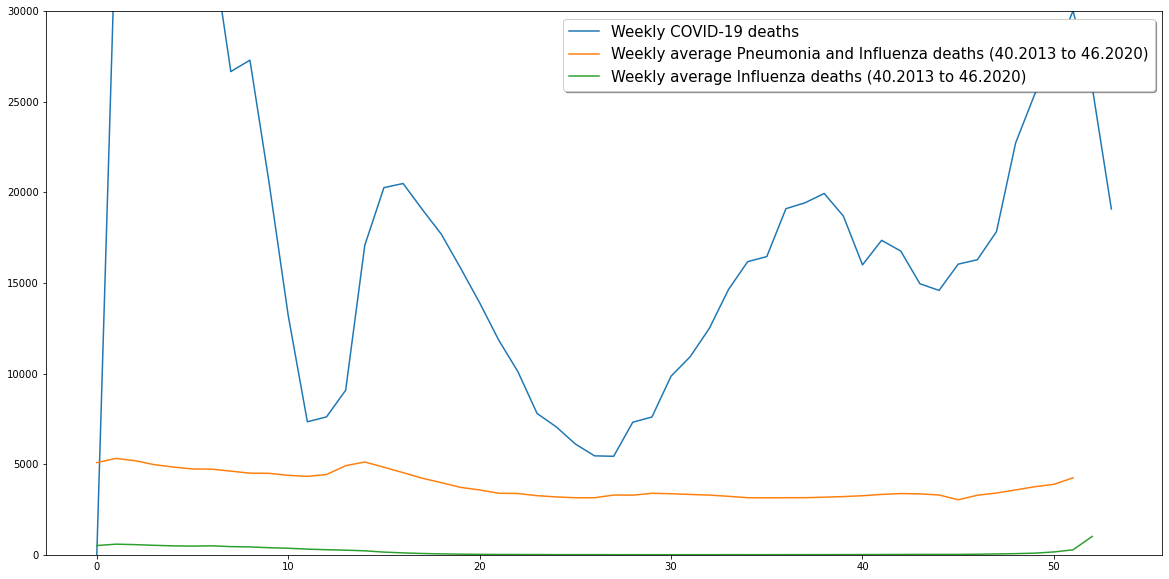

In [3]:
# Attempt to accumulate data by week of year.
from datetime import datetime
from numpy import zeros

weekly_deaths = zeros(54)
daily_deaths = diff(death_data)

for index in range(len(daily_deaths)):
    date_string = first_row_shifted[index]
    week_of_year = datetime.strptime(date_string, "%m/%d/%y").strftime("%V")
    weekly_deaths[int(week_of_year)] += daily_deaths[index]

    plt.figure(1)
plt.figure(figsize=(20,10))
plt.plot(weekly_deaths,label="Weekly COVID-19 deaths")
plt.plot(PI, label="Weekly average Pneumonia and Influenza deaths (40.2013 to 46.2020)")
plt.plot(Influenza, label="Weekly average Influenza deaths (40.2013 to 46.2020)")
plt.ylim(0,30000)
ax = plt.gca()
ax.legend(loc='upper right', shadow=True, fontsize=15)

Peak:-2615.0 Avg Peak:999.3571428571429
Day zero:-102.31360510963155 Avg Day zero:39.10050939876687
Day zero:-51.156802554815776 Avg Day zero:19.550254699383434
2022-03-15 2022-04-24
2022-03-15 2022-04-04


IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 432x288 with 0 Axes>

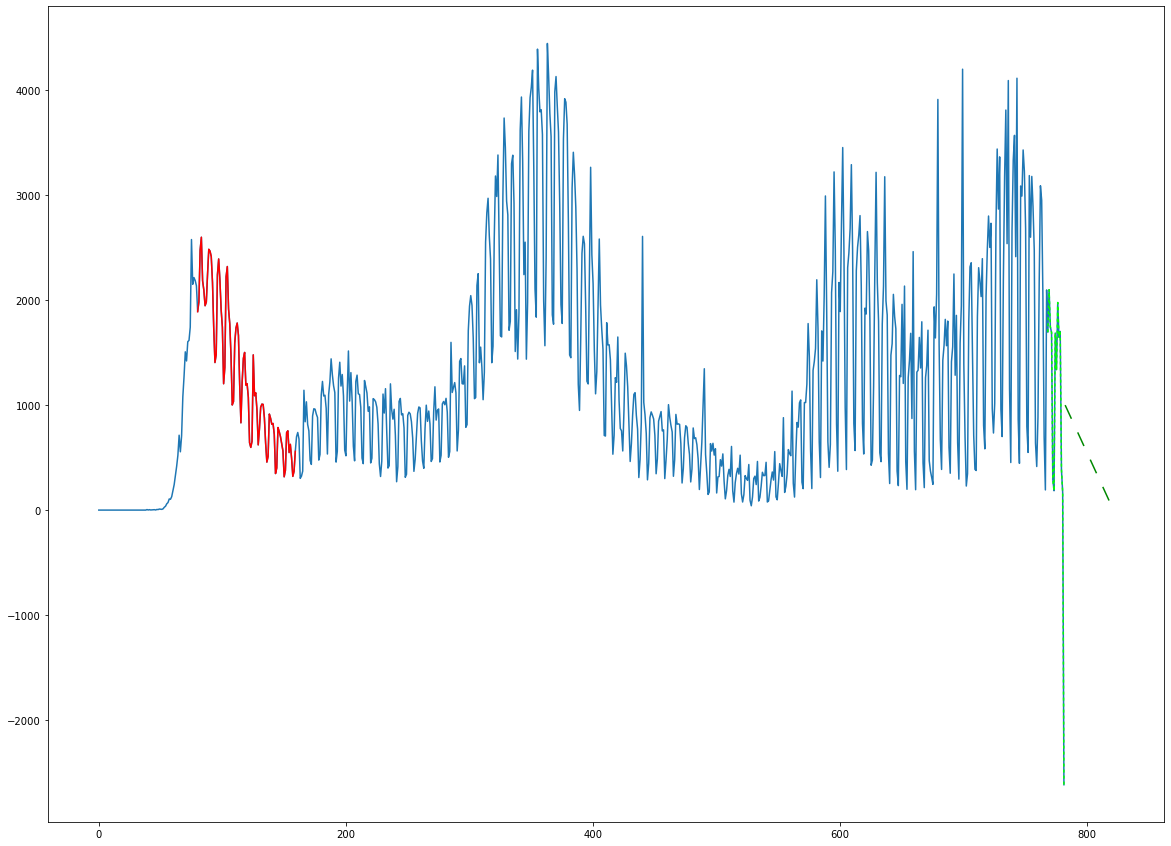

In [4]:
from numpy import polyfit, arange
import datetime
from os import path
import json

drop_from_peak = diff_death_data[80:160]
x_drop_from_peak = arange(80,160)
[m, b] = polyfit(x_drop_from_peak, drop_from_peak, 1)


first_data_index = len(diff_death_data)-14
last_data_index = len(diff_death_data)
x_new_peak = arange(first_data_index,last_data_index)
new_peak = diff_death_data[x_new_peak]
average_new_peak = sum(new_peak)/len(new_peak)

print("Peak:" + str(new_peak[len(new_peak)-1]) + " Avg Peak:" + str(average_new_peak))

day_for_zero = -new_peak[len(new_peak)-1]/m
average_day_for_zero = -average_new_peak/m

day_for_zero_twice = -new_peak[len(new_peak)-1]/(2*m)
average_day_for_zero_twice = -average_new_peak/(2*m)

print("Day zero:" + str(day_for_zero) + " Avg Day zero:" + str(average_day_for_zero))
print("Day zero:" + str(day_for_zero_twice) + " Avg Day zero:" + str(average_day_for_zero_twice))

x_forecast = arange(len(diff_death_data), len(diff_death_data) + day_for_zero)
x_forecast_average = arange(len(diff_death_data), len(diff_death_data) + average_day_for_zero)
x_last_value = len(diff_death_data)
y_last_value = diff_death_data[x_last_value-1]
y_forecast = [ (y_last_value + m*(i - x_last_value)) for i in x_forecast ]
y_forecast_average = [ (average_new_peak + m*(i - x_last_value)) for i in x_forecast_average ]

x_forecast_twice = arange(len(diff_death_data), len(diff_death_data) + day_for_zero_twice)
x_forecast_average_twice = arange(len(diff_death_data), len(diff_death_data) + average_day_for_zero_twice)
y_forecast_twice = [ (y_last_value + 2*m*(i - x_last_value)) for i in x_forecast_twice ]
y_forecast_average_twice = [ (average_new_peak + 2*m*(i - x_last_value)) for i in x_forecast_average_twice ]


today = datetime.date.today()
end_of_forecast_date = today + datetime.timedelta(days=len(x_forecast))
end_of_forecast_date_average = today + datetime.timedelta(days=len(x_forecast_average))
print(str(end_of_forecast_date) + " " + str(end_of_forecast_date_average))

end_of_forecast_date_twice = today + datetime.timedelta(days=len(x_forecast_twice))
end_of_forecast_date_average_twice = today + datetime.timedelta(days=len(x_forecast_average_twice))
print(str(end_of_forecast_date_twice) + " " + str(end_of_forecast_date_average_twice))


plt.figure(1)
plt.figure(figsize=(20,15))
plt.plot(diff_death_data, label="COVID-19 Deaths")
plt.plot(x_drop_from_peak, drop_from_peak, color='#ff0000', label="Data used to estimate drop off")
plt.plot(x_new_peak, new_peak, color='#00ff00', dashes=[2,2], label="Data near current peak")

plt.plot(x_forecast, y_forecast, color="#00ff00", dashes=[5,5], label="Linear drop off using estimate")
plt.plot(x_forecast_average, y_forecast_average, color="#008800", dashes=[10,10], label="Linear drop off from average using estimate")
plt.text(x_forecast[len(x_forecast)-1], y_forecast[len(x_forecast)-1], end_of_forecast_date, fontsize=15)
plt.text(x_forecast_average[len(x_forecast_average)-1], y_forecast_average[len(x_forecast_average)-1]+200, end_of_forecast_date_average, fontsize=15)


plt.plot(x_forecast_twice, y_forecast_twice, color="#ff0000", dashes=[5,5], label="DOUBLE Linear drop off using estimate")
plt.plot(x_forecast_average_twice, y_forecast_average_twice, color="#880000", dashes=[10,10], label="DOUBLE Linear drop off from average using estimate")
plt.text(x_forecast_twice[len(x_forecast_twice)-1], y_forecast_twice[len(x_forecast_twice)-1], end_of_forecast_date_twice, fontsize=15)
plt.text(x_forecast_average_twice[len(x_forecast_average_twice)-1], y_forecast_average_twice[len(x_forecast_average_twice)-1]+200, end_of_forecast_date_average_twice, fontsize=15)


ax = plt.gca()
ax.legend(loc='upper left', shadow=True, fontsize=15)

FORECAST_FILE = 'forecasts_end_of_covid.txt'
if (path.exists(FORECAST_FILE)):
    forecast_file = open(FORECAST_FILE, 'r')
    end_of_covid = json.load(forecast_file)
    forecast_file.close()
else:
    end_of_covid = {}
    
print(end_of_covid)
    
if (not str(today) in end_of_covid):
    print("Updating file: " + FORECAST_FILE)
    end_of_covid.update({ str(today) : str([end_of_forecast_date_average,end_of_forecast_date]) })
    forecast_file = open(FORECAST_FILE, 'w+')
    json.dump(end_of_covid, forecast_file)
    forecast_file.close()

{'2020-12-31': '[datetime.date(2021, 4, 9), datetime.date(2021, 5, 29)]', '2021-01-01': '[datetime.date(2021, 4, 11), datetime.date(2021, 5, 17)]', '2021-01-02': '[datetime.date(2021, 4, 10), datetime.date(2021, 3, 25)]', '2021-01-04': '[datetime.date(2021, 4, 11), datetime.date(2021, 3, 1)]', '2021-01-05': '[datetime.date(2021, 4, 12), datetime.date(2021, 3, 22)]', '2021-01-08': '[datetime.date(2021, 4, 21), datetime.date(2021, 6, 24)]', '2021-01-10': '[datetime.date(2021, 5, 5), datetime.date(2021, 6, 8)]', '2021-01-11': '[datetime.date(2021, 5, 8), datetime.date(2021, 3, 25)]', '2021-01-12': '[datetime.date(2021, 5, 10), datetime.date(2021, 4, 2)]', '2021-01-13': '[datetime.date(2021, 5, 13), datetime.date(2021, 7, 5)]', '2021-01-14': '[datetime.date(2021, 5, 15), datetime.date(2021, 6, 21)]', '2021-01-15': '[datetime.date(2021, 5, 17), datetime.date(2021, 6, 21)]', '2021-01-16': '[datetime.date(2021, 5, 22), datetime.date(2021, 6, 1)]', '2021-01-17': '[datetime.date(2021, 5, 27), d

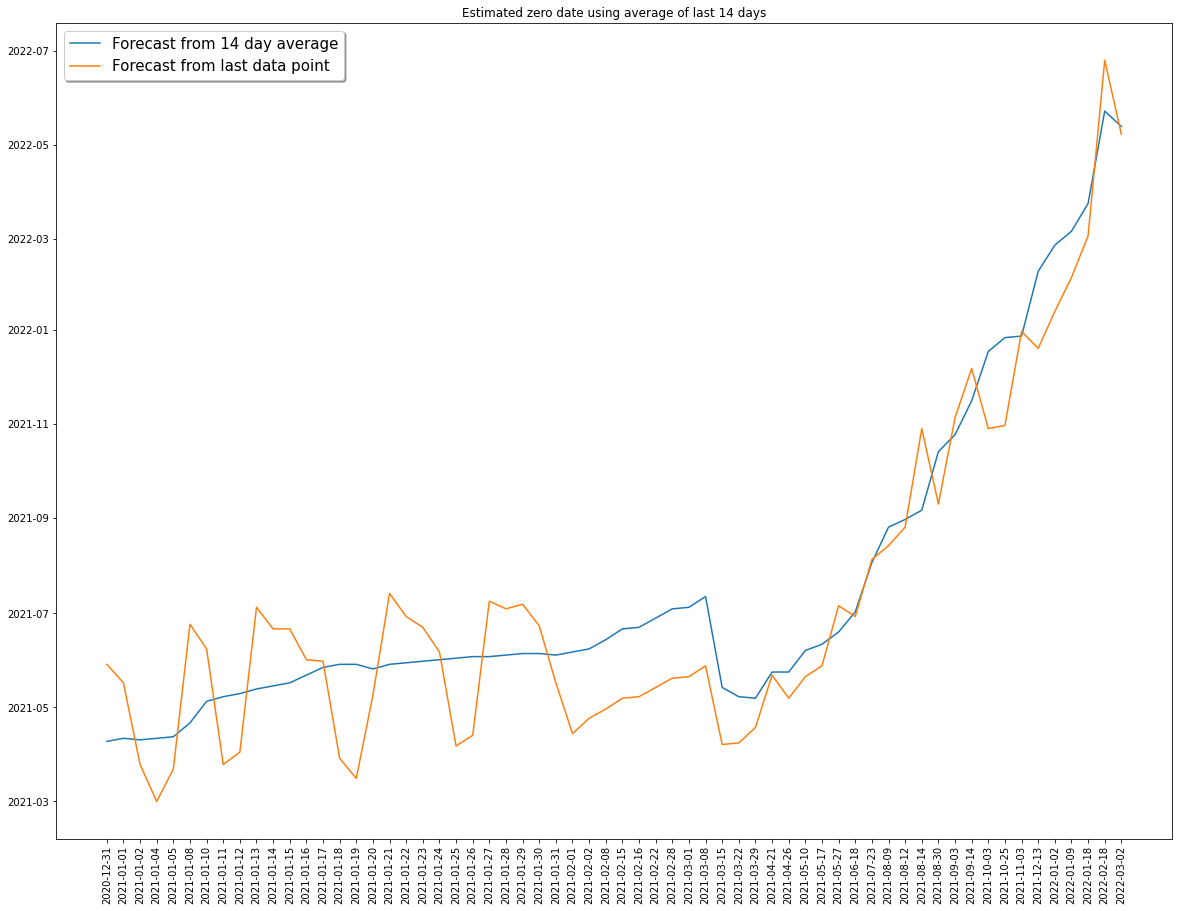

In [6]:
print(end_of_covid)
avg_dates = [ eval(x) for date,x in end_of_covid.items()]
print(avg_dates)
print(avg_dates[0][0])
print(type(avg_dates[0][0]))
date_of_forecast = [ date for date,x in end_of_covid.items()]
avg_dates_2 = [ eval(x)[0] for date,x in end_of_covid.items()]
peak_dates = [ eval(x)[1] for date,x in end_of_covid.items()]
print(avg_dates_2)

plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(date_of_forecast,avg_dates_2,label="Forecast from 14 day average")
plt.plot(date_of_forecast,peak_dates,label="Forecast from last data point")
plt.title("Estimated zero date using average of last 14 days")
ax = plt.gca()
ax.legend(loc='upper left', shadow=True, fontsize=15)

In [11]:
import numpy as np
np.average(diff_death_data[-28:])

1438.9642857142858